# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt

In [2]:
# Load the data from the Excel file
file_path = 'Processed_Data_G3.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe and the column names
data.head(), data.columns

(   Facilitating Condition  Subjective Norms  Organizational Justice  \
 0                    2.50              2.25                    2.00   
 1                    1.50              3.00                    1.25   
 2                    2.50              2.25                    1.50   
 3                    1.75              2.50                    2.00   
 4                    1.75              2.00                    2.00   
 
    Attitude toward Cyberslacking  Cyberslacking Self-Efficacy  \
 0                           1.00                         3.00   
 1                           1.00                         3.00   
 2                           2.25                         2.25   
 3                           2.00                         1.50   
 4                           1.75                         1.50   
 
    Conscientiousness  Personality Traits  Job Stress  Cyberslacking  \
 0               2.00            1.000000        1.25            3.0   
 1               1.25   

# Data Visualization

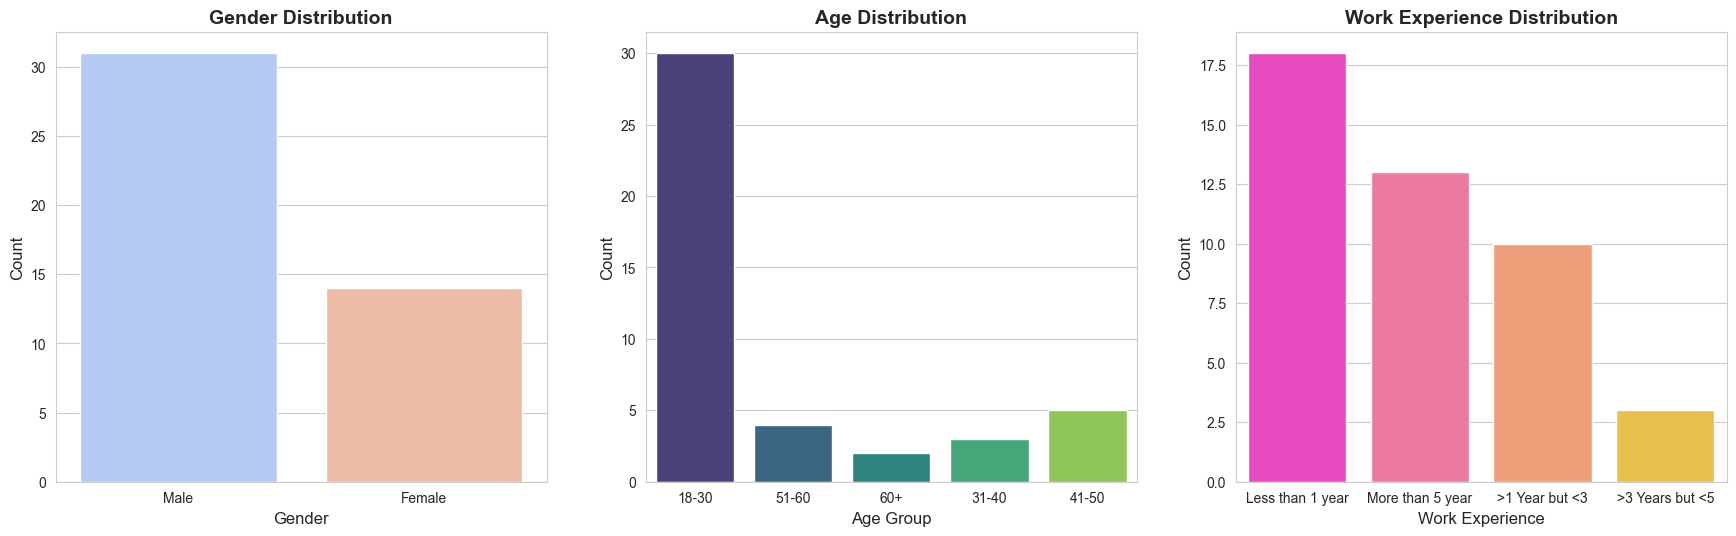

In [3]:
# Create bar charts for demographic data
plt.figure(figsize=(18, 6))

# Gender Distribution
plt.subplot(1, 3, 1)
sns.countplot(x='Gender', data=data, palette='coolwarm')
plt.title('Gender Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)

# Age Distribution
plt.subplot(1, 3, 2)
sns.countplot(x='Age', data=data, palette='viridis')
plt.title('Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)

# Work Experience Distribution
plt.subplot(1, 3, 3)
sns.countplot(x='Work experience in business organization', data=data, palette='spring')
plt.title('Work Experience Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Work Experience', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)

# Adjust spacing between subplots
plt.tight_layout(pad=3)

# Display the plot
plt.show()


# Label Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders for each categorical variable
le_gender = LabelEncoder()
le_age = LabelEncoder()
le_education = LabelEncoder()
le_income = LabelEncoder()
le_experience = LabelEncoder()

# Transform the categorical columns
data['Gender'] = le_gender.fit_transform(data['Gender'])
data['Age'] = le_age.fit_transform(data['Age'])
data['Education'] = le_education.fit_transform(data['Education'])
data['Monthly Income'] = le_income.fit_transform(data['Monthly Income'])
data['Work experience in business organization'] = le_experience.fit_transform(data['Work experience in business organization'])

# Display the transformed data to verify
data.head(), data.dtypes

(   Facilitating Condition  Subjective Norms  Organizational Justice  \
 0                    2.50              2.25                    2.00   
 1                    1.50              3.00                    1.25   
 2                    2.50              2.25                    1.50   
 3                    1.75              2.50                    2.00   
 4                    1.75              2.00                    2.00   
 
    Attitude toward Cyberslacking  Cyberslacking Self-Efficacy  \
 0                           1.00                         3.00   
 1                           1.00                         3.00   
 2                           2.25                         2.25   
 3                           2.00                         1.50   
 4                           1.75                         1.50   
 
    Conscientiousness  Personality Traits  Job Stress  Cyberslacking  \
 0               2.00            1.000000        1.25            3.0   
 1               1.25   

# Correlation matrix

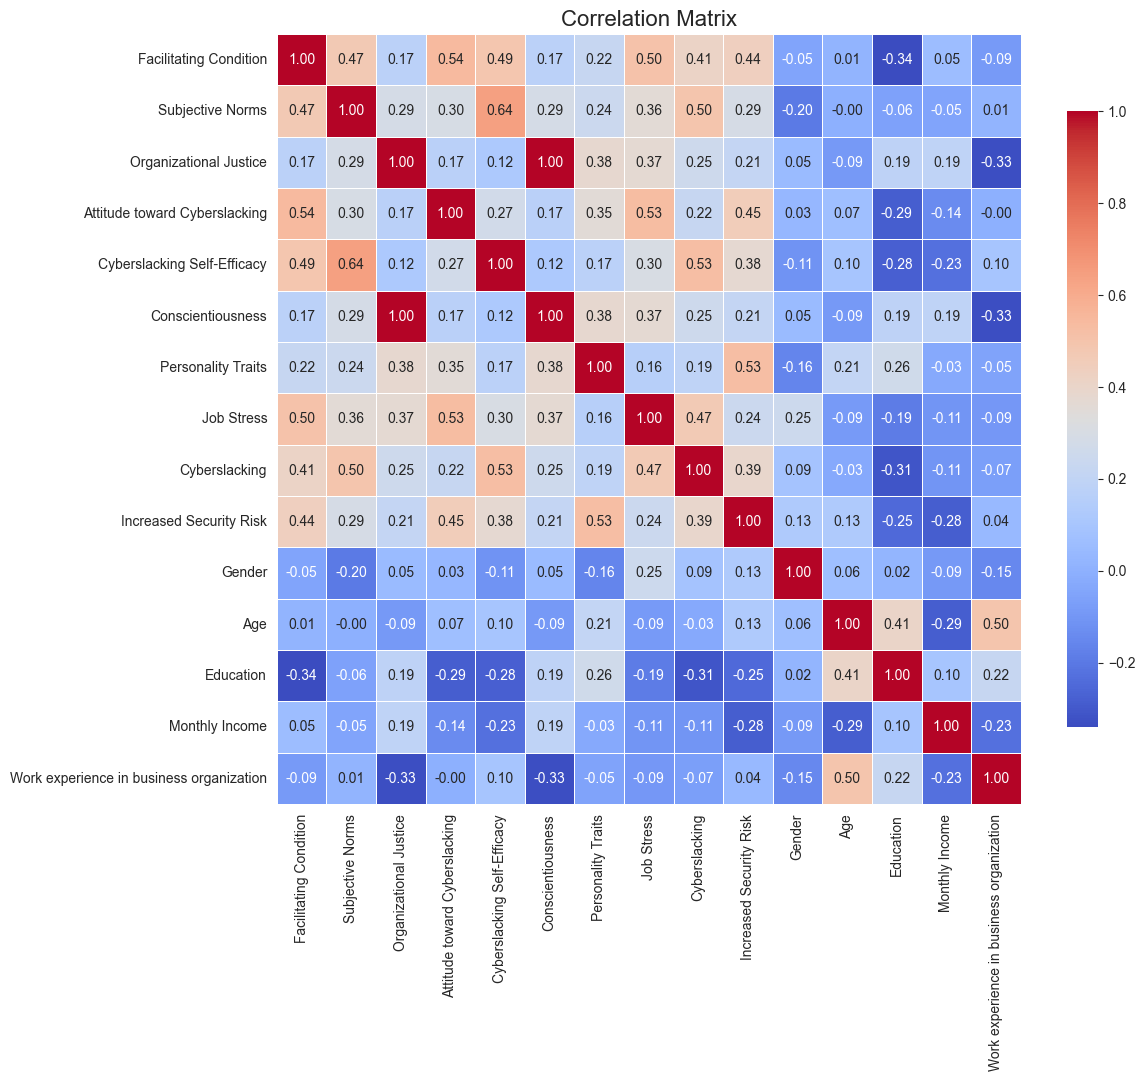

In [5]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap for correlation
plt.figure(figsize=(12, 10))  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            linewidths=0.5, cbar_kws={"shrink": .8})  
plt.title('Correlation Matrix', fontsize=16) 
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10, rotation=0) 
plt.show()


# Correlation values

### Cyberslacking

In [6]:
cyberslacking_correlations = correlation_matrix['Cyberslacking'].sort_values(ascending=False)

cyberslacking_correlations

Cyberslacking                               1.000000
Cyberslacking Self-Efficacy                 0.525564
Subjective Norms                            0.495405
Job Stress                                  0.468028
Facilitating Condition                      0.412617
Increased Security Risk                     0.390011
Organizational Justice                      0.253587
Conscientiousness                           0.253587
Attitude toward Cyberslacking               0.222035
Personality Traits                          0.189886
Gender                                      0.087440
Age                                        -0.031084
Work experience in business organization   -0.068374
Monthly Income                             -0.109381
Education                                  -0.311132
Name: Cyberslacking, dtype: float64

### Increased Security Risk 

In [7]:
increased_security_risk_correlations = correlation_matrix['Increased Security Risk'].sort_values(ascending=False)

increased_security_risk_correlations

Increased Security Risk                     1.000000
Personality Traits                          0.527741
Attitude toward Cyberslacking               0.452142
Facilitating Condition                      0.435589
Cyberslacking                               0.390011
Cyberslacking Self-Efficacy                 0.376712
Subjective Norms                            0.289356
Job Stress                                  0.243976
Organizational Justice                      0.209461
Conscientiousness                           0.209461
Age                                         0.126895
Gender                                      0.126302
Work experience in business organization    0.038904
Education                                  -0.248756
Monthly Income                             -0.283077
Name: Increased Security Risk, dtype: float64

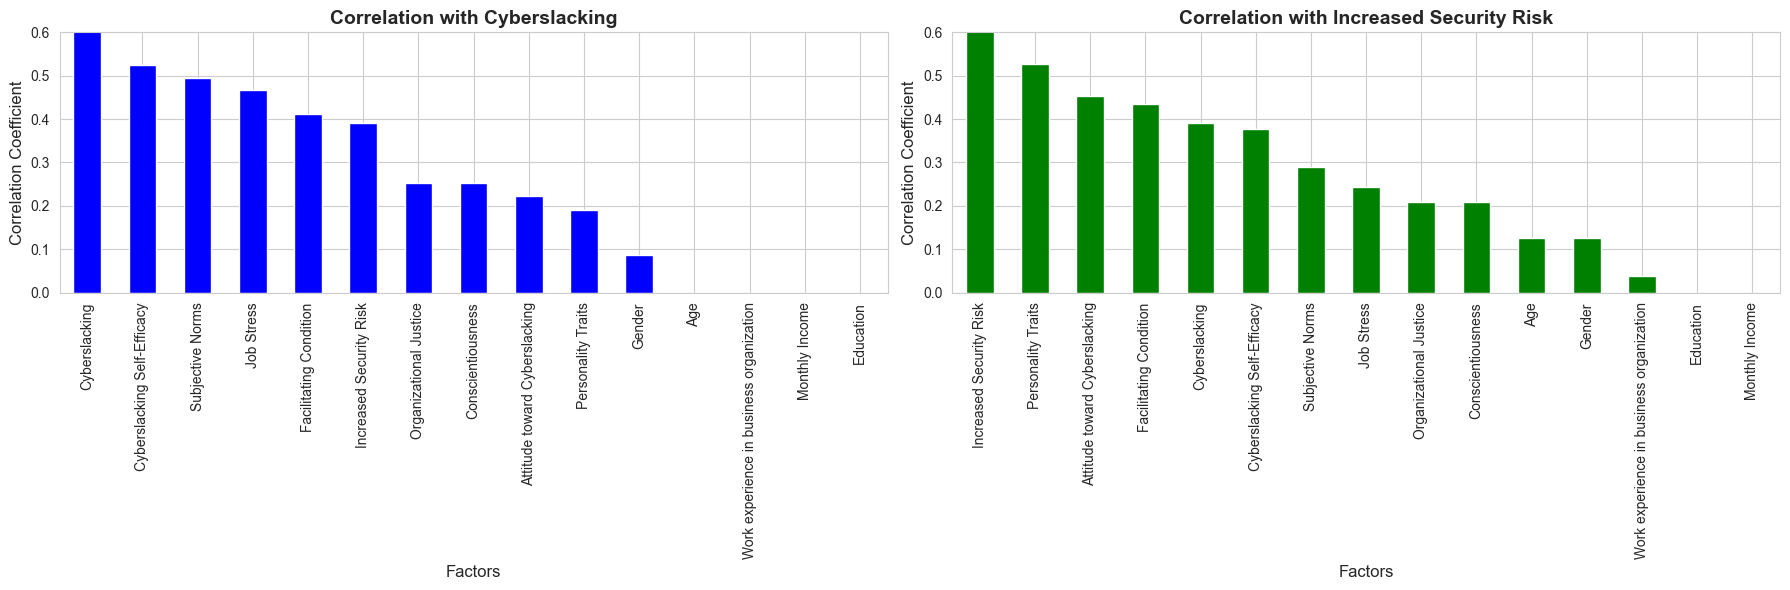

In [8]:
colors = ['blue', 'green']
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plot for Cyberslacking
cyberslacking_correlations.plot(kind='bar', ax=ax[0], color=colors[0], legend=False)
ax[0].set_title('Correlation with Cyberslacking', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Correlation Coefficient', fontsize=12)
ax[0].set_xlabel('Factors', fontsize=12)
ax[0].tick_params(axis='x',labelsize=10)
ax[0].set_ylim(0, 0.6)

# Plot for Increased Security Risk
increased_security_risk_correlations.plot(kind='bar', ax=ax[1], color=colors[1], legend=False)
ax[1].set_title('Correlation with Increased Security Risk', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Correlation Coefficient', fontsize=12)
ax[1].set_xlabel('Factors', fontsize=12)
ax[1].tick_params(axis='x',labelsize=10)
ax[1].set_ylim(0, 0.6)

plt.tight_layout()
plt.show()
